In [1]:
import os
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_dataset(filename):
     with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        next(lines)
        dataset = list(lines)
        data = np.array([[float(row[col_i]) for col_i in range(0,len(row))] for row in dataset])
        #print(data)
        return data

In [3]:
csv_images = 'images.csv'
im_pixels = get_dataset(csv_images)
im_pixels.shape

(4965, 2304)

In [4]:
imCount = im_pixels.shape[0]
pixelPerIm = im_pixels.shape[1]
dim = np.sqrt(pixelPerIm)
dim = int(dim)

In [5]:
#images = np.reshape(im_pixels, (imCount, dim, dim)) 
mean = np.mean(im_pixels, axis=0)
normalizedData = im_pixels - mean

In [6]:
covariance = np.cov(normalizedData.T)
covariance.shape


(2304, 2304)

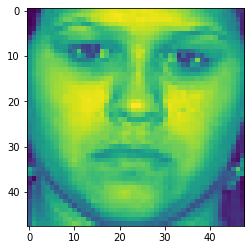

In [7]:
dt = np.reshape(im_pixels[1], (48,48), order='C')
plt.imshow(dt)


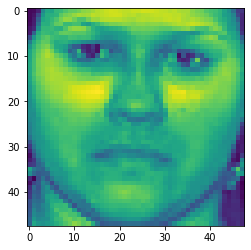

In [8]:
dt = np.reshape(normalizedData[1], (48,48), order='C')
plt.imshow(dt)

In [9]:
(cov_eigenVal, cov_eigenVec) = np.linalg.eig(covariance)

In [10]:
def PCA(eigenVal,eigenVect,k):
    index_arr = np.argsort(eigenVal)[::-1]
    sortedEigenVect = eigenVect[:,index_arr]
    sortedEigenVal = eigenVal[index_arr]
    return sortedEigenVect[:,:k].T, sortedEigenVal[:k]/np.sum(sortedEigenVal)*100

In [11]:
a = 1000
eigenFaces = PCA(cov_eigenVal,cov_eigenVec,a)
eigenFaces[0].shape


(1000, 2304)

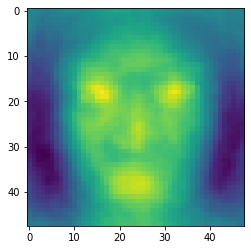

In [12]:
dt = np.reshape(eigenFaces[0][0,:], (48,48), order='C')
plt.imshow(dt)

In [13]:
eigenFaces[1][0]

28.33447489537037

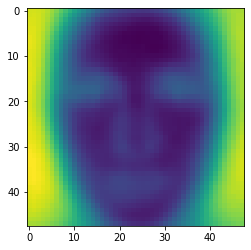

In [14]:
dt = np.reshape(eigenFaces[0][1,:], (48,48), order='C')
plt.imshow(dt)

In [15]:
eigenFaces[1][1]

11.027901264243285

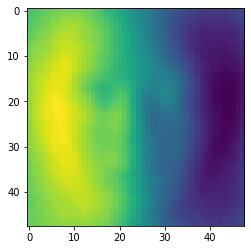

In [16]:
dt = np.reshape(eigenFaces[0][2,:], (48,48), order='C')
plt.imshow(dt)

In [17]:
eigenFaces[1][2]

9.766803183987745

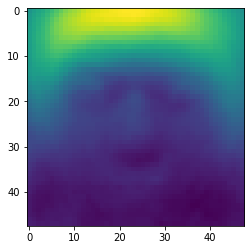

In [18]:
dt = np.reshape(eigenFaces[0][3,:], (48,48), order='C')
plt.imshow(dt)

In [19]:
eigenFaces[1][3]

6.101507486957519

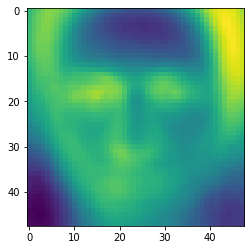

In [20]:
dt = np.reshape(eigenFaces[0][4,:], (48,48), order='C')
plt.imshow(dt)

In [21]:
eigenFaces[1][4]

3.2178286612646843

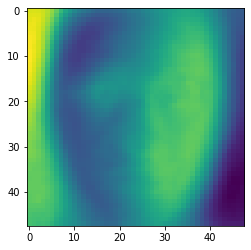

In [22]:
dt = np.reshape(eigenFaces[0][5,:], (48,48), order='C')
plt.imshow(dt)

In [23]:
eigenFaces[1][5]

2.860724839829491

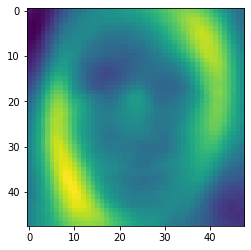

In [24]:
dt = np.reshape(eigenFaces[0][6,:], (48,48), order='C')
plt.imshow(dt)

In [25]:
eigenFaces[1][6]

2.095556184991677

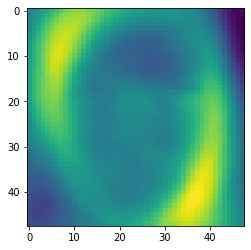

In [26]:
dt = np.reshape(eigenFaces[0][7,:], (48,48), order='C')
plt.imshow(dt)

In [27]:
eigenFaces[1][7]

2.0521356816013756

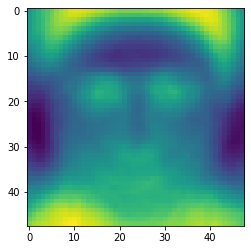

In [28]:
dt = np.reshape(eigenFaces[0][8,:], (48,48), order='C')
plt.imshow(dt)

In [29]:
eigenFaces[1][8]

1.8418297879458267

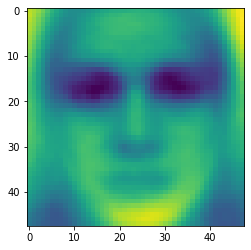

In [30]:
dt = np.reshape(eigenFaces[0][9,:], (48,48), order='C')
plt.imshow(dt)

In [31]:
eigenFaces[1][9]

1.4091219567233426

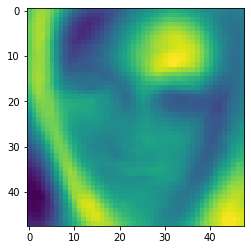

In [32]:
dt = np.reshape(eigenFaces[0][10,:], (48,48), order='C')
plt.imshow(dt)

In [33]:
eigenFaces[1][10]

1.222163168912795

In [34]:
def reconstruction(images, eigenvectors, mean):
    PCscores = np.matmul(images, eigenvectors)
    projection = np.matmul(PCscores,eigenvectors.T)
    projection = projection + mean
    return projection

In [35]:
def best_approximation(imageVector, eigenvectors, mean):
    PCscores = np.matmul(imageVector, eigenvectors)
    projection = np.matmul(PCscores,eigenvectors.T)
    projection = projection + mean 
    return projection


In [36]:
p = reconstruction(im_pixels, eigenFaces[0].T, mean)

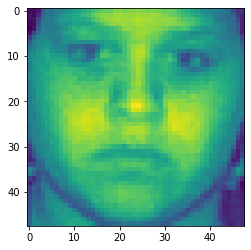

In [37]:
dt = np.reshape(p[1], (48,48), order='C')
plt.imshow(dt)

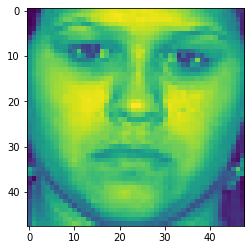

In [38]:
dt = np.reshape(im_pixels[1], (48,48), order='C')
plt.imshow(dt)

In [39]:
p1 = best_approximation(im_pixels[1], eigenFaces[0].T, mean[1])

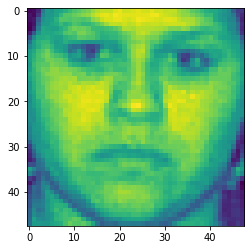

In [40]:
dt = np.reshape(p1, (48,48), order='C')
plt.imshow(dt)

In [41]:
#do not grade here I'm just trying to reconstruct images that are not in the dataset to see if it works
with open('baris.csv', 'r') as csvfile:
    lines = csv.reader(csvfile)
    data = list(lines)
    baris = np.array([[float(row[col_i]) for col_i in range(0,len(row))] for row in data])

In [42]:
p2 = best_approximation(baris,eigenFaces[0].T,np.mean(baris))

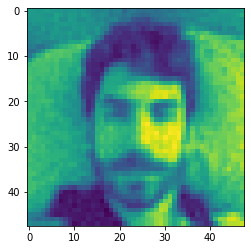

In [43]:
#reconstruction
dt = np.reshape(p2, (48,48), order='C')
plt.imshow(dt.T)

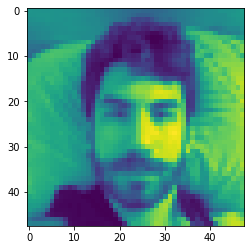

In [44]:
#original
dt = np.reshape(baris, (48,48), order='C')
plt.imshow(dt.T)

Variance explained when k is 16 is 74.55551104287305
Variance explained when k is 32 is 81.70344117917905
Variance explained when k is 64 is 87.66082895533422
Variance explained when k is 128 is 92.33361402918939
Variance explained when k is 256 is 95.75140124043078
Variance explained when k is 512 is 98.12936648462211
Variance explained when k is 1024 is 99.50412616748224
Variance explained when k is 2048 is 99.98487680172006
Variance explained when k is 4096 is 100.0


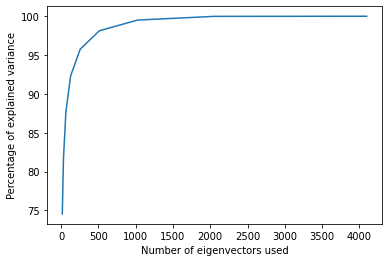

In [45]:
#Q1.2
#proportion of variance explained
#(cov_eigenVal, cov_eigenVec)
eigen_indices = np.argsort(cov_eigenVal)[::-1] #descending order
eigenVal_sorted = cov_eigenVal[eigen_indices]
k = np.array([16,32,64,128,256,512,1024, 2048, 4096])
total_variance = np.sum(eigenVal_sorted)
varianceExplainedWhenKisK = np.zeros(k.shape[0])
for i in range(varianceExplainedWhenKisK.shape[0]):
    varianceExplainedWhenKisK[i] = np.sum(eigenVal_sorted[:k[i]]/total_variance*100)
for i in range(varianceExplainedWhenKisK.shape[0]):
    print("Variance explained when k is " + str(k[i]) + " is " + str(varianceExplainedWhenKisK[i]) )
plt.plot(k,varianceExplainedWhenKisK)
plt.xlabel("Number of eigenvectors used")
plt.ylabel("Percentage of explained variance")
plt.show()

In [46]:
#Q1.3
#k = 1
eigenFaces1 = PCA(cov_eigenVal,cov_eigenVec,1)
reconst1 = best_approximation(im_pixels[0],eigenFaces1[0].T,mean[0])
#k = 10
eigenFaces10 = PCA(cov_eigenVal,cov_eigenVec,10)
reconst10 = best_approximation(im_pixels[0],eigenFaces10[0].T,mean[0])
#k = 50
eigenFaces50 = PCA(cov_eigenVal,cov_eigenVec,50)
reconst50 = best_approximation(im_pixels[0],eigenFaces50[0].T,mean[0])
#k = 100 
eigenFaces100 = PCA(cov_eigenVal,cov_eigenVec,100)
reconst100 = best_approximation(im_pixels[0],eigenFaces100[0].T,mean[0])
#k = 500
eigenFaces500 = PCA(cov_eigenVal,cov_eigenVec,500)
reconst500 = best_approximation(im_pixels[0],eigenFaces500[0].T,mean[0])


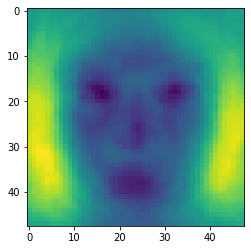

In [47]:
dt1 = np.reshape(reconst1, (48,48), order='C')
plt.imshow(dt1)

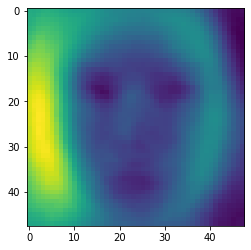

In [48]:
dt10 = np.reshape(reconst10, (48,48), order='C')
plt.imshow(dt10)

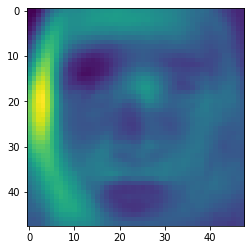

In [49]:
dt50 = np.reshape(reconst50, (48,48), order='C')
plt.imshow(dt50)

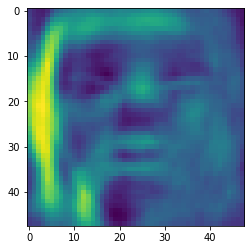

In [50]:
dt100 = np.reshape(reconst100, (48,48), order='C')
plt.imshow(dt100)

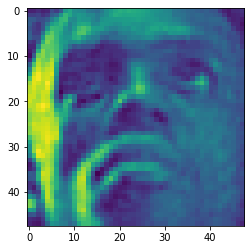

In [51]:
dt500 = np.reshape(reconst500, (48,48), order='C')
plt.imshow(dt500)